In [1]:
import pandas as pd

from classes.DataFrameHandler import MasterDataframes
from classes.Trainers import MonoModelTrainer
from sklearn.metrics import mean_absolute_error


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

/Users/miksx/.pyenv/versions/3.11.4/envs/TDT4173/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
M_df = MasterDataframes()

# Training A

In [3]:
trials=3
submission="seventeenth"

In [4]:
model_a = MonoModelTrainer().train_model(location="A", trials=trials)

[I 2023-10-17 04:14:34,383] A new study created in memory with name: regression
[I 2023-10-17 04:14:37,576] Trial 1 finished with value: 0.061713982506785954 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 4, 'learning_rate': 0.7413274004991911, 'n_estimators': 540, 'min_child_weight': 5, 'gamma': 0.9995448459397365, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_alpha': 0.8710675419792644, 'reg_lambda': 0.1800903413606064, 'random_state': 665}. Best is trial 1 with value: 0.061713982506785954.
[I 2023-10-17 04:14:38,243] Trial 2 finished with value: 0.11223620603180337 and parameters: {'objective': 'reg:squarederror', 'eval_metric': 'mae', 'tree_method': 'hist', 'max_depth': 10, 'learning_rate': 0.2505251812592975, 'n_estimators': 437, 'min_child_weight': 4, 'gamma': 0.6513851442510924, 'subsample': 0.7, 'colsample_bytree': 1.0, 'reg_alpha': 0.8926720878570209, 'reg_lambda': 0.661216247039005, 'random_state': 857}. Best is t

R2:  0.8237395297855098
RMSE:  0.0835797785689038
graded! MAE:  0.044947758639202126
Best params: {
    "objective": "reg:squarederror",
    "eval_metric": "mae",
    "tree_method": "hist",
    "max_depth": 7,
    "learning_rate": 0.9133856350192731,
    "n_estimators": 641,
    "min_child_weight": 3,
    "gamma": 0.1964126724766476,
    "subsample": 0.85,
    "colsample_bytree": 0.75,
    "reg_alpha": 0.6792775750159704,
    "reg_lambda": 0.4753514754925571,
    "random_state": 164
}


In [5]:
# model_a.plot_important_features(top=30)

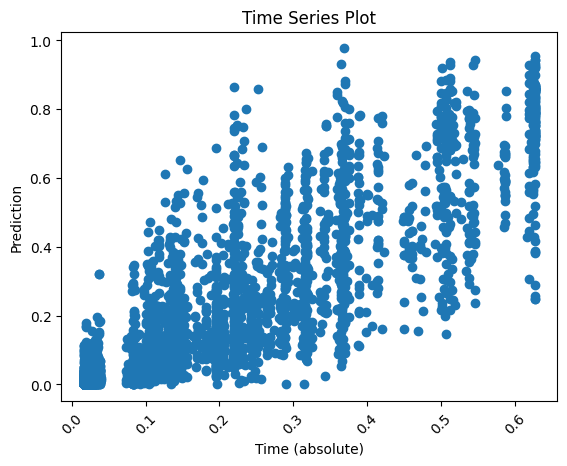

In [6]:
model_a.plot_pred_vs_test()

# Train B

In [7]:
model_b = MonoModelTrainer().train_model(location="B", merge_dfs=True, trials=trials)

KeyboardInterrupt: 

In [ ]:
# model_b.plot_important_features(50)

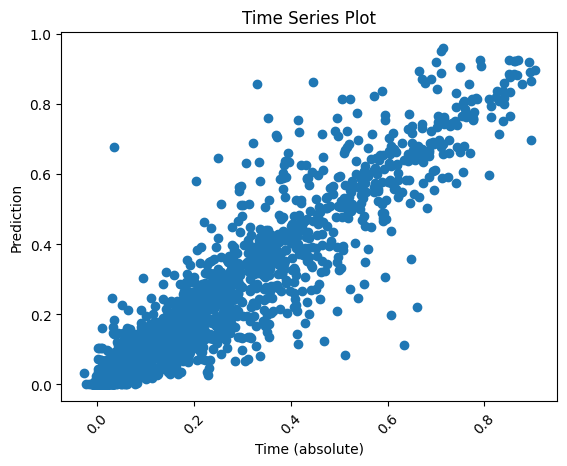

In [ ]:
model_b.plot_pred_vs_test()

# Train c

In [ ]:
model_c = MonoModelTrainer().train_model(location="C", merge_dfs=True, trials=trials)

[I 2023-10-06 22:13:27,069] A new study created in memory with name: regression
[I 2023-10-06 22:13:27,816] Trial 5 finished with value: 0.08401975025328665 and parameters: {'max_leaf_nodes': 22, 'learning_rate': 0.3968091743705049, 'max_depth': 13, 'min_samples_leaf': 22, 'max_bins': 50}. Best is trial 5 with value: 0.08401975025328665.
[I 2023-10-06 22:13:27,839] Trial 4 finished with value: 0.08401975025328665 and parameters: {'max_leaf_nodes': 15, 'learning_rate': 0.39151399250698865, 'max_depth': 13, 'min_samples_leaf': 22, 'max_bins': 76}. Best is trial 5 with value: 0.08401975025328665.
[I 2023-10-06 22:13:27,847] Trial 1 finished with value: 0.08401975025328665 and parameters: {'max_leaf_nodes': 13, 'learning_rate': 0.20861154418276784, 'max_depth': 12, 'min_samples_leaf': 26, 'max_bins': 104}. Best is trial 5 with value: 0.08401975025328665.
[I 2023-10-06 22:13:27,849] Trial 2 finished with value: 0.08401975025328665 and parameters: {'max_leaf_nodes': 29, 'learning_rate': 0.25

R2:  0.9054459365423837
RMSE:  0.05298089406936807
graded! MAE:  0.02401484762661578
Best params: {
    "max_leaf_nodes": 22,
    "learning_rate": 0.3968091743705049,
    "max_depth": 13,
    "min_samples_leaf": 22,
    "max_bins": 50
}


In [ ]:
# model_c.plot_important_features(30)

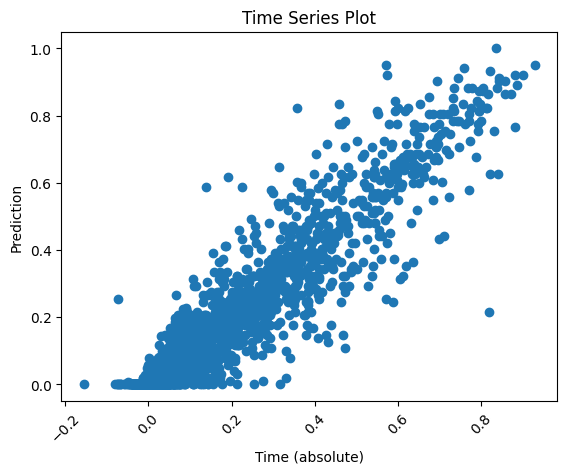

In [ ]:
model_c.plot_pred_vs_test()

# Create prediction

In [ ]:
y_pred_a = model_a.predict_test_data("A", merge_df=True)
print("Length pred: ", len(y_pred_a))
y_pred_b = model_b.predict_test_data("B", merge_df=True)
print("Length pred: ", len(y_pred_b))
y_pred_c = model_c.predict_test_data("C", merge_df=True)
print("Length pred: ", len(y_pred_c))

predictions = list(y_pred_a) + list(y_pred_b) + list(y_pred_c)

Location A. length: 2880
Length pred:  720
Location B. length: 2880
Length pred:  720
Location C. length: 2880
Length pred:  720


In [ ]:
compare_best = pd.read_csv("submissions/best_prediction.csv")["prediction"]

In [ ]:
print("MAE: "+ str(mean_absolute_error(compare_best, predictions)))

MAE: 97.6489528026221


In [ ]:
len(predictions)

2160

In [ ]:
df = pd.DataFrame({"prediction":predictions}).rename_axis(index="id")
df.to_csv(f"submissions/{submission}_submission.csv")

# Predict from pickle_file

In [ ]:
# model_a_pickle = pickle.load(open("models/A_xgb_MAE_172_.pkl", "rb"))

In [ ]:
# pickle_model = MLModel(model_a_pickle)

In [ ]:
# pickle_model.predict_test_data("A")